In [1]:
import pandas as pd
import numpy as np
import warnings
from utils import utils_gn, utils_sevsn, utils_noah, utils_models
from sklearn.svm import NuSVR
import importlib
importlib.reload(utils_gn)
importlib.reload(utils_sevsn)
importlib.reload(utils_noah)
importlib.reload(utils_models)
warnings.filterwarnings('ignore')

In [2]:
# read the data
df_raw = (utils_gn.read_data('severson_all.pkl')).drop('cycle_life', axis=1).join(utils_gn.read_data('noah_all.pkl'))
df = df_raw.copy()
df.head()

,mean_Q_100_10,log_mean_Q_100_10,var_Q_100_10,log_var_Q_100_10,min_Q_100_10,log_min_Q_100_10,skew_Q_100_10,log_skew_Q_100_10,kurt_Q_100_10,log_kurt_Q_100_10,...,dVdQpeak_maxmag_di_y_100m0,dVdQpeak_maxmag_di_y_diff,dVdQpeak_maxarea_di_y_0,dVdQpeak_maxarea_di_y_50,dVdQpeak_maxarea_di_y_100,dVdQpeak_maxarea_di_y_100m0,dVdQpeak_maxarea_di_y_diff,dSOHdCycCyc1,dSOHdCycCyc100,cycle_life
b1c0,-0.002873,-2.541602,0.000010,-5.014861,-0.008460,-2.072648,-0.532058,-0.274041,1.651688,0.217928,...,-0.005402,0.003024,-79.299389,-75.009448,-67.092799,12.206590,3.626709,0.000388,-0.000031,1851.0
b1c1,-0.004100,-2.387257,0.000010,-5.013960,-0.011004,-1.958457,-0.429375,-0.367163,1.970884,0.294661,...,0.001894,0.000708,-75.511329,-73.411862,-63.284437,12.226892,8.027959,0.000396,-0.000019,2159.0
b1c2,-0.004487,-2.348070,0.000018,-4.737000,-0.017216,-1.764058,-1.080194,0.033502,3.348637,0.524868,...,-0.003083,0.006358,-76.601709,-73.345940,-65.473419,11.128290,4.616753,0.000312,-0.000013,2236.0
b1c3,-0.007456,-2.127507,0.000036,-4.442613,-0.018961,-1.722149,-0.439050,-0.357486,1.904584,0.279800,...,-0.000753,0.013632,-80.446334,-67.731448,-54.750980,25.695354,0.265582,0.000353,-0.000013,1433.0
b1c4,-0.005750,-2.240332,0.000023,-4.647744,-0.013958,-1.855177,-0.362548,-0.440634,1.666169,0.221719,...,0.002110,0.000972,-75.575598,-65.232594,-55.380306,20.195292,-0.490716,0.000347,-0.000030,1708.0


In [3]:
# prune cells with more than 1250 cycle life
df = df[df['cycle_life'] <= 1250]
df.index

Index(['b1c5', 'b1c6', 'b1c7', 'b1c9', 'b1c11', 'b1c14', 'b1c15', 'b1c16',
       'b1c17', 'b1c18',
       ...
       'b3c29', 'b3c30', 'b3c31', 'b3c34', 'b3c35', 'b3c36', 'b3c40', 'b3c41',
       'b3c43', 'b3c44'],
      dtype='object', length=113)

In [4]:
# define parameters to be used 
test_size=0.2
params={"nu": 0.9,
        "C": 0.01,
        "kernel": "linear"}

### NuSVR without scaling and feature selection

NuSVR training has started...
NuSVR training has ended after 0.03 seconds
------------------
Model metrics:
------------------
{'MAE': 52.71449160816274,
 'MAPE': 0.08012159352628453,
 'MSE': 4750.439135432525,
 'R2 score': 0.9131928788144086,
 'RMSE': 68.92342951009131}


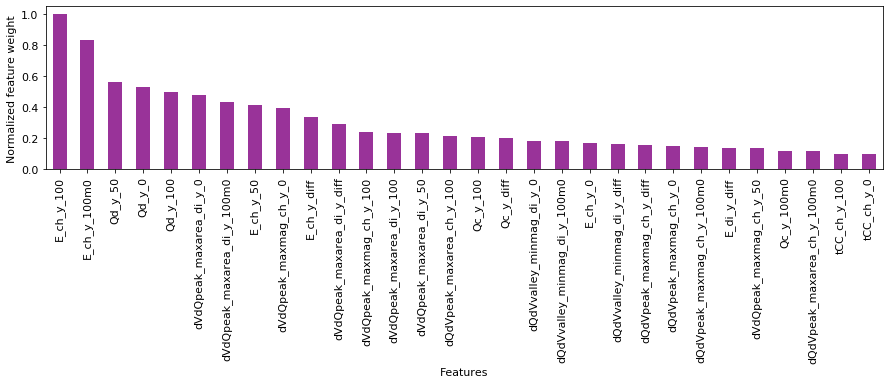

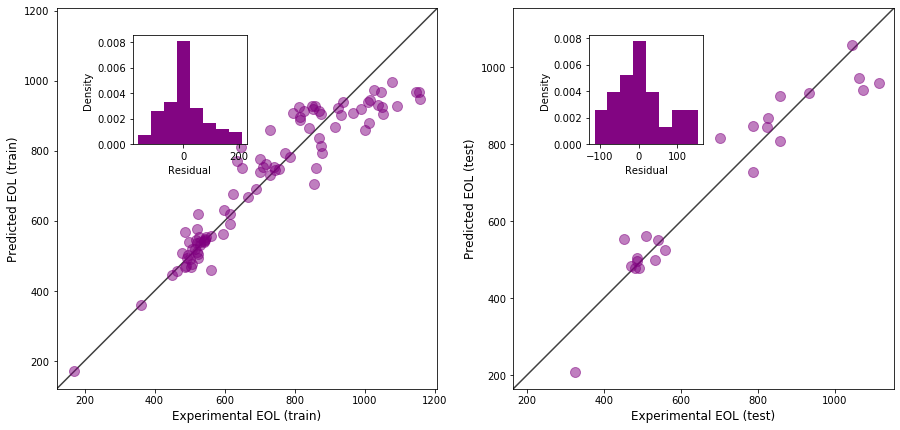

In [45]:
model, metrics = utils_models.fit_nusvr(df=df,
                                        test_size=test_size,
                                        feature_selection=False,
                                        scaling=False,
                                        params=params,
                                        plot=True,
                                        fname='nusvr_model')

### NuSVR with scaling but without feature selection

NuSVR training has started...
NuSVR training has ended after 0.0 seconds
------------------
Model metrics:
------------------
{'MAE': 177.81994713420434,
 'MAPE': 0.27111478775246506,
 'MSE': 40592.336066315074,
 'R2 score': 0.2582361891909528,
 'RMSE': 201.47539816641404}


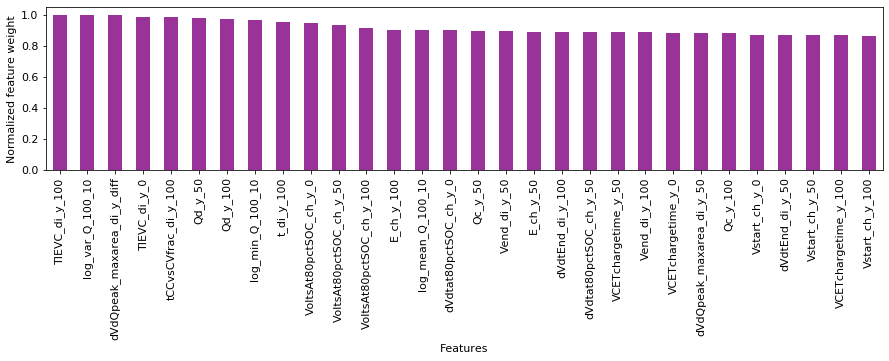

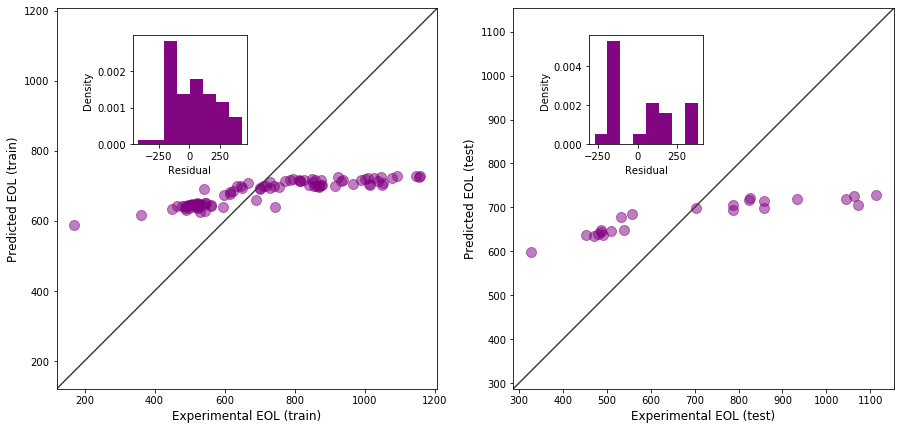

In [33]:
model, metrics = utils_models.fit_nusvr(df=df,
                                        test_size=test_size,
                                        feature_selection=False,
                                        scaling=True,
                                        params=params,
                                        plot=True,
                                        fname='nusvr_scaled_model')

### NuSVR with feature selection but without scaling with $k=0.5, 0.6, 0.7, 0.8, 0.9$

In [34]:
# create a list of k
k_list = [0.9, 0.8, 0.6, 0.5, 0.4, 0.3, 0.2]

Fitting model with 90 percent of features...
25 features removed from a total of 244
NuSVR training has started...
NuSVR training has ended after 0.09 seconds
------------------
Model metrics:
------------------
{'MAE': 64.7967693801329,
 'MAPE': 0.10620144694110396,
 'MSE': 10454.736022057685,
 'R2 score': 0.8089554437060485,
 'RMSE': 102.24840351838108}


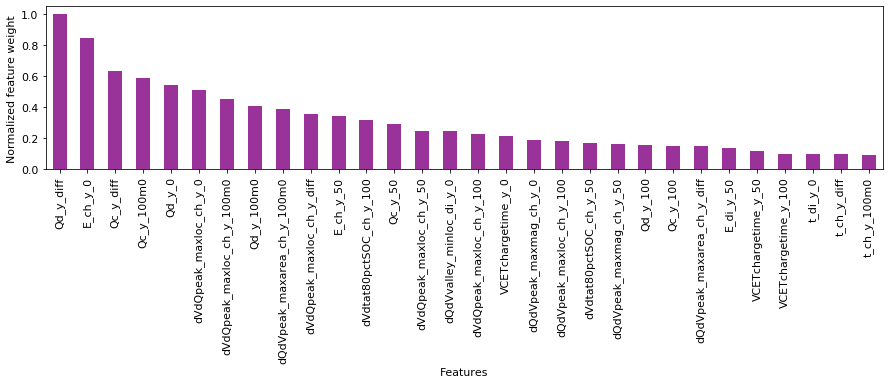

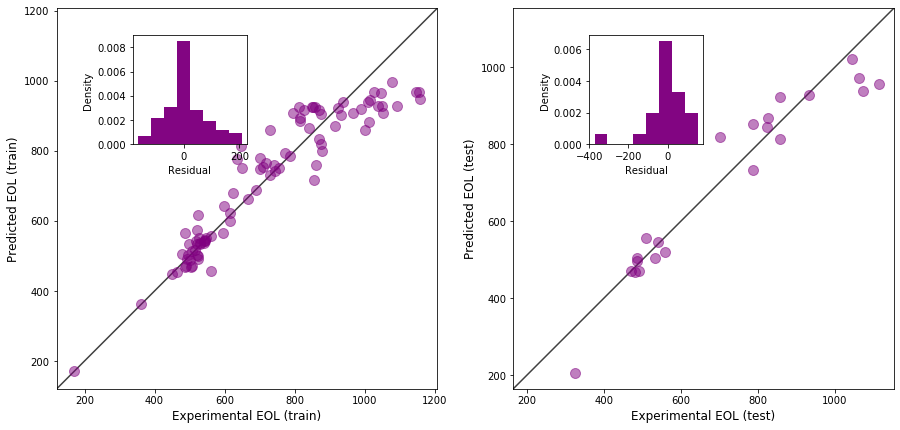

Fitting model with 80 percent of features...
49 features removed from a total of 244
NuSVR training has started...
NuSVR training has ended after 0.16 seconds
------------------
Model metrics:
------------------
{'MAE': 64.33037233407863,
 'MAPE': 0.106863716151282,
 'MSE': 10648.44066572348,
 'R2 score': 0.8054157830562595,
 'RMSE': 103.1912819269316}


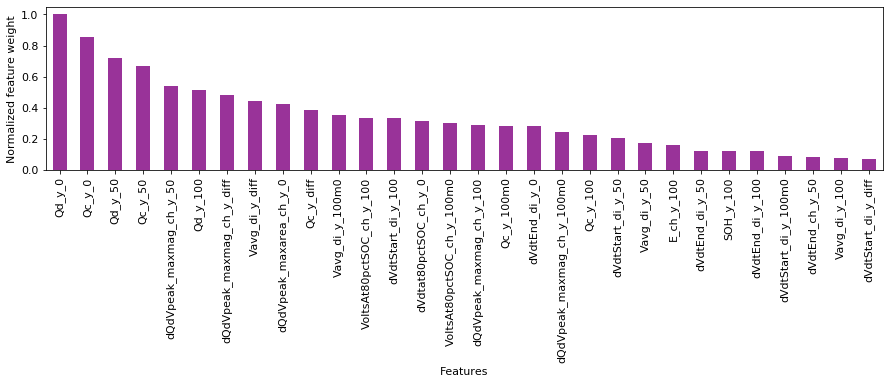

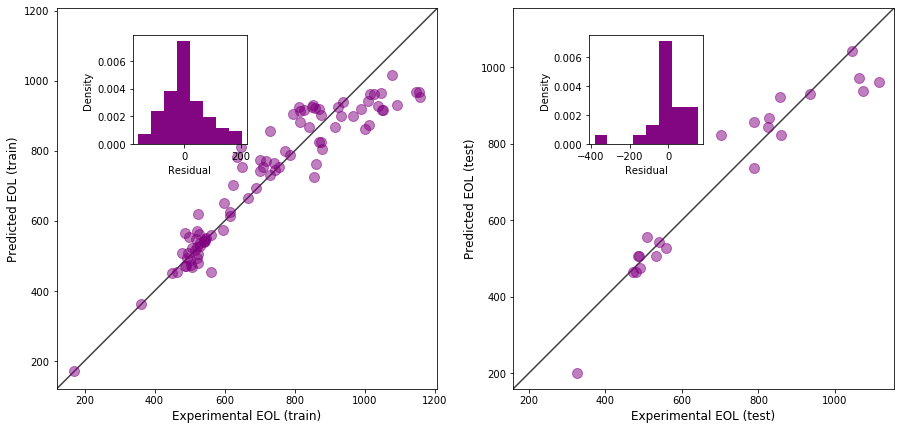

Fitting model with 60 percent of features...
98 features removed from a total of 244
NuSVR training has started...
NuSVR training has ended after 0.09 seconds
------------------
Model metrics:
------------------
{'MAE': 65.05173694841348,
 'MAPE': 0.10790995355676337,
 'MSE': 10473.274100524935,
 'R2 score': 0.8086166882398325,
 'RMSE': 102.33901553427674}


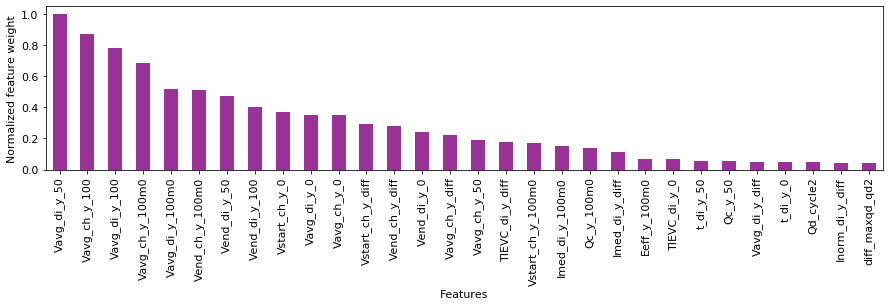

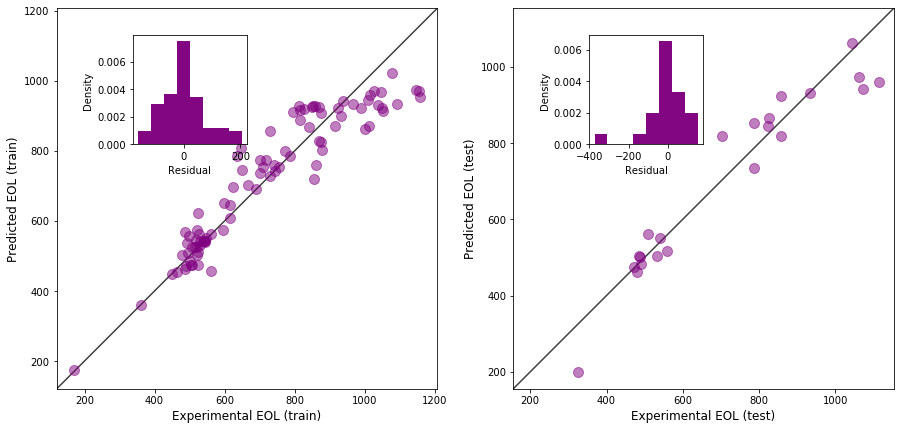

Fitting model with 50 percent of features...
122 features removed from a total of 244
NuSVR training has started...
NuSVR training has ended after 0.11 seconds
------------------
Model metrics:
------------------
{'MAE': 60.745529653331765,
 'MAPE': 0.08960331259321824,
 'MSE': 5914.959568079098,
 'R2 score': 0.8919130216395531,
 'RMSE': 76.90877432438445}


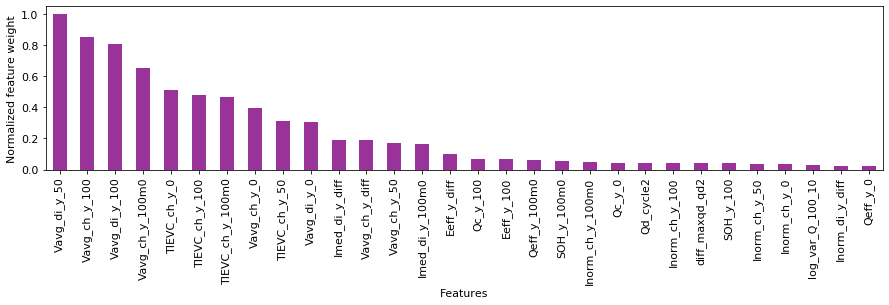

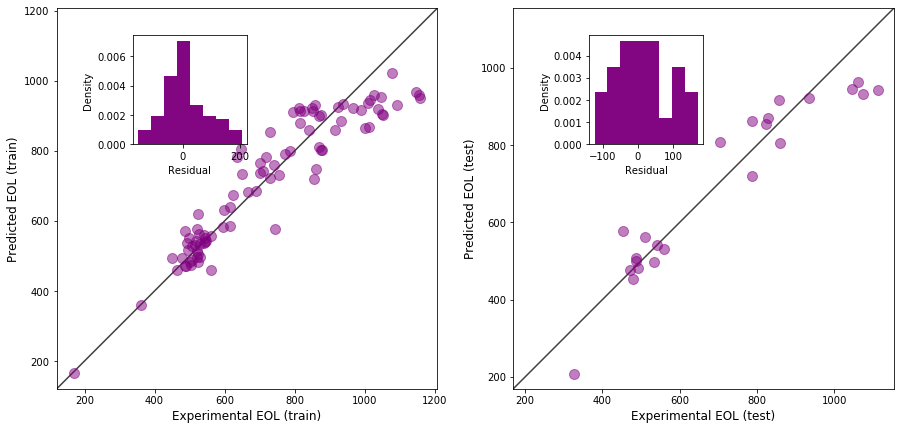

Fitting model with 40 percent of features...
147 features removed from a total of 244
NuSVR training has started...
NuSVR training has ended after 0.08 seconds
------------------
Model metrics:
------------------
{'MAE': 59.68972110100193,
 'MAPE': 0.0884379668242025,
 'MSE': 5920.768301966714,
 'R2 score': 0.8918068757755305,
 'RMSE': 76.94652884936859}


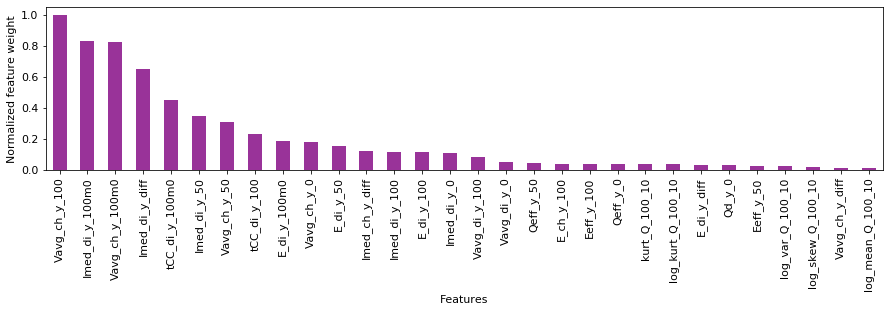

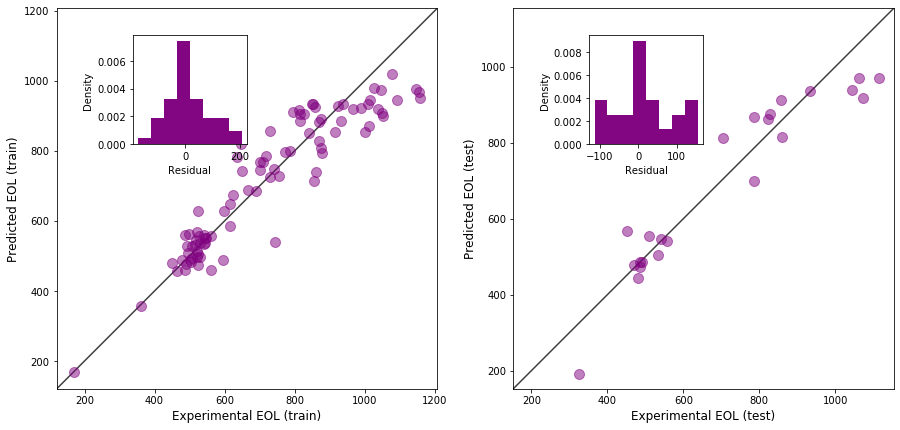

Fitting model with 30 percent of features...
171 features removed from a total of 244
NuSVR training has started...
NuSVR training has ended after 0.03 seconds
------------------
Model metrics:
------------------
{'MAE': 65.36340211732592,
 'MAPE': 0.1022103074961933,
 'MSE': 6868.628485100382,
 'R2 score': 0.8744861583768874,
 'RMSE': 82.87718917229506}


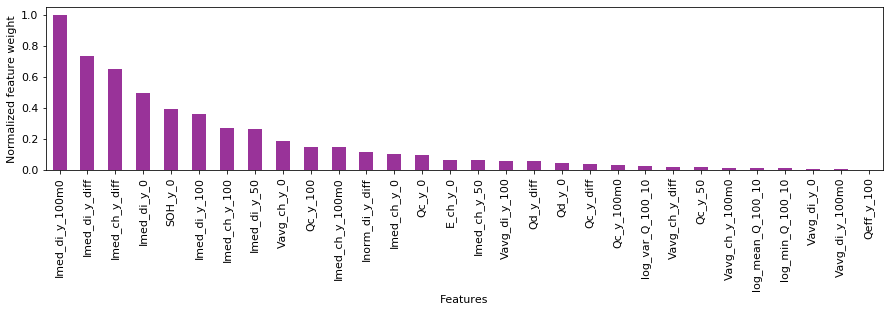

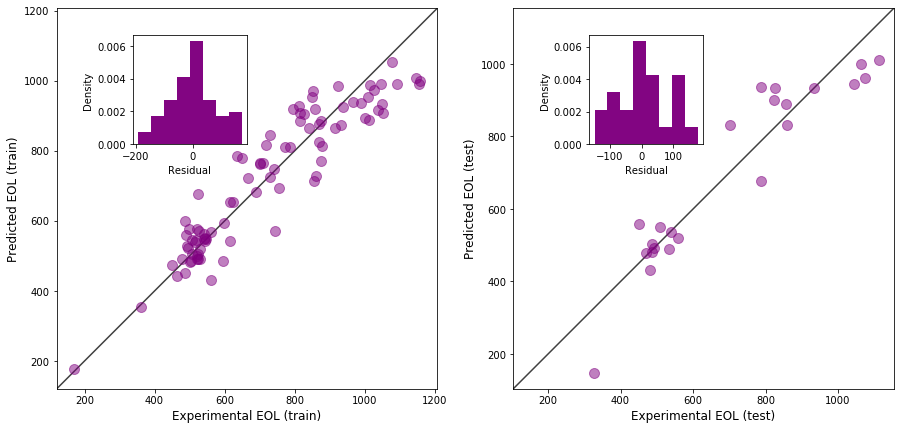

Fitting model with 20 percent of features...
196 features removed from a total of 244
NuSVR training has started...
NuSVR training has ended after 0.02 seconds
------------------
Model metrics:
------------------
{'MAE': 68.12959325448901,
 'MAPE': 0.1050093430373861,
 'MSE': 7015.693883529707,
 'R2 score': 0.8717987596965338,
 'RMSE': 83.7597390369007}


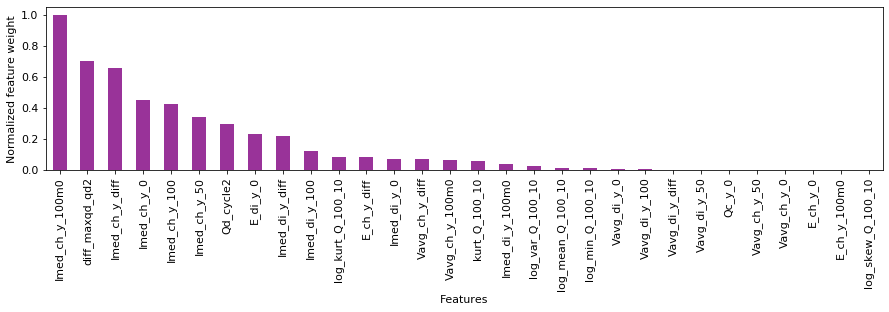

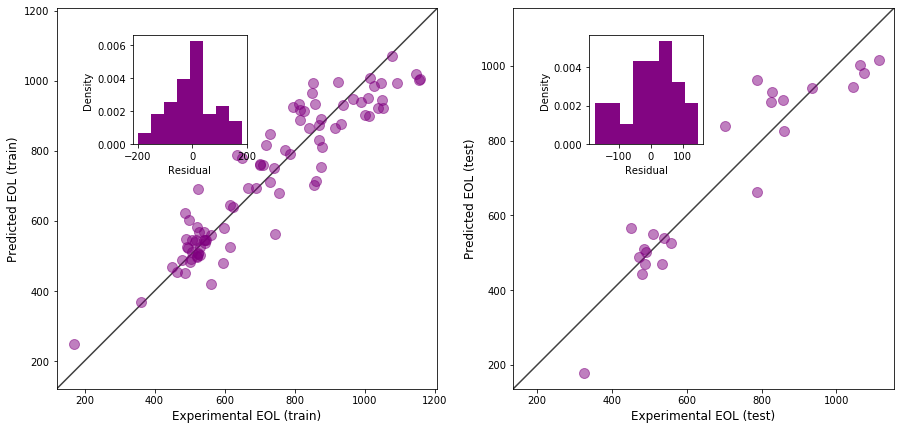

,MAE,MAPE,MSE,RMSE,R2 score
Features used (%),,,,,
90.0,64.796769,0.106201,10454.736022,102.248404,0.808955
80.0,64.330372,0.106864,10648.440666,103.191282,0.805416
60.0,65.051737,0.107910,10473.274101,102.339016,0.808617
50.0,60.745530,0.089603,5914.959568,76.908774,0.891913
40.0,59.689721,0.088438,5920.768302,76.946529,0.891807
30.0,65.363402,0.102210,6868.628485,82.877189,0.874486
20.0,68.129593,0.105009,7015.693884,83.759739,0.871799


In [35]:
metric_list = []

for k in k_list:
    print('Fitting model with {} percent of features...'.format(int(k*100)))
    model, metrics = utils_models.fit_nusvr(df=df,
                                            test_size=test_size,
                                            feature_selection=True,
                                            scaling=False,
                                            params=params,
                                            plot=True,
                                            fname='nusvr_model_ftselection_k_'+str(int(k*100)),
                                            k=k)
    metric_list.append(list(metrics.values()))

metric_data = pd.DataFrame(data=np.array(metric_list), columns=metrics.keys(), index=np.array(k_list)*100)
metric_data.index.name = 'Features used (%)'
metric_data

### NuSVR with feature selection and scaling with $k=0.5, 0.6, 0.7, 0.8, 0.9$

Fitting model with 90 percent of features...
25 features removed from a total of 244
NuSVR training has started...
NuSVR training has ended after 0.0 seconds
------------------
Model metrics:
------------------
{'MAE': 177.8737202228601,
 'MAPE': 0.2712309701241621,
 'MSE': 40617.444529678956,
 'R2 score': 0.25777736983554733,
 'RMSE': 201.53770002081237}


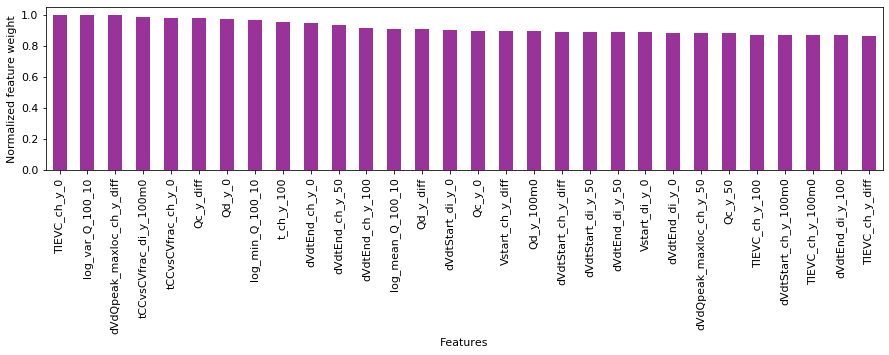

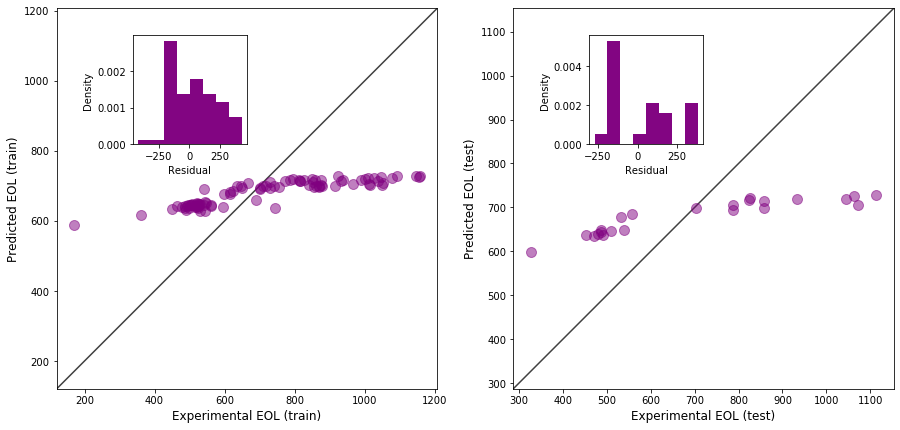

Fitting model with 80 percent of features...
49 features removed from a total of 244
NuSVR training has started...
NuSVR training has ended after 0.0 seconds
------------------
Model metrics:
------------------
{'MAE': 177.8654667242024,
 'MAPE': 0.27120389045528376,
 'MSE': 40606.84693613871,
 'R2 score': 0.25797102489784707,
 'RMSE': 201.51140646657873}


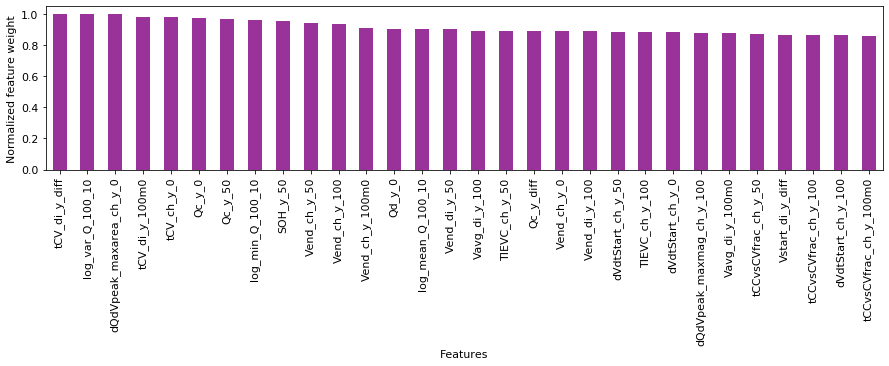

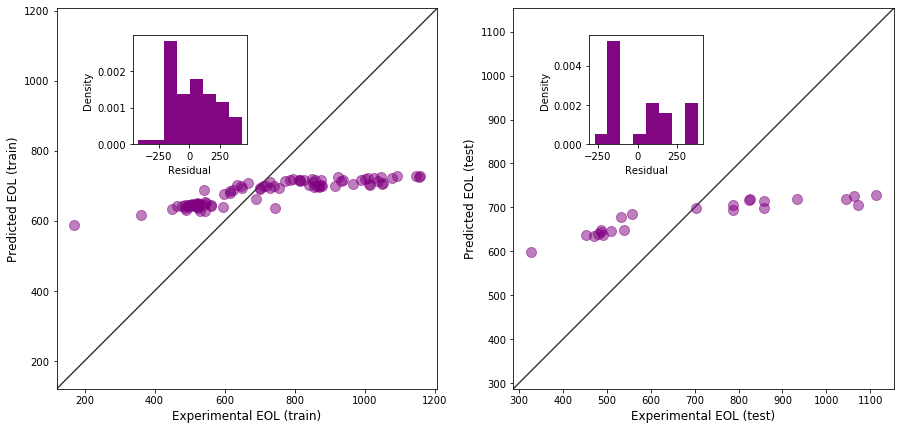

Fitting model with 60 percent of features...
98 features removed from a total of 244
NuSVR training has started...
NuSVR training has ended after 0.0 seconds
------------------
Model metrics:
------------------
{'MAE': 177.79473057696586,
 'MAPE': 0.2714168246470923,
 'MSE': 40565.025602369074,
 'R2 score': 0.2587352467908518,
 'RMSE': 201.40761058701102}


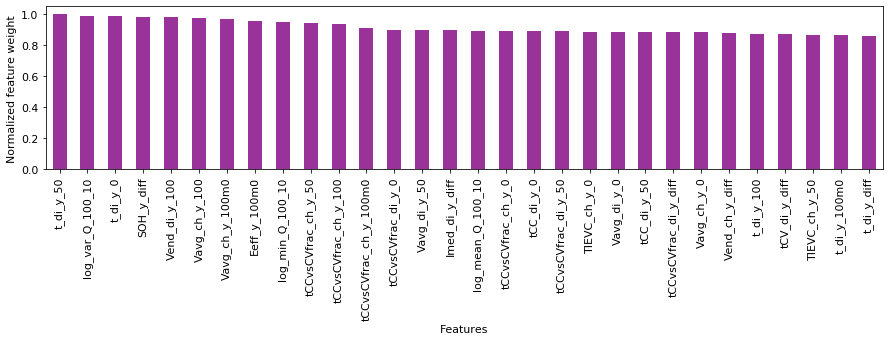

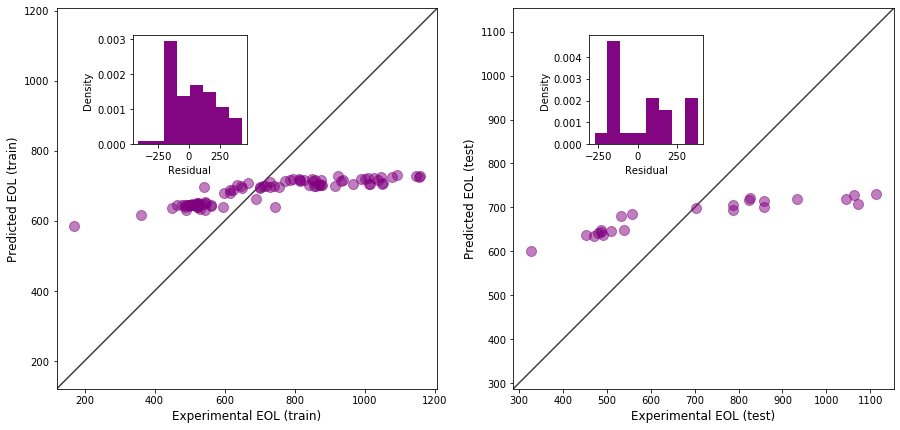

Fitting model with 50 percent of features...
122 features removed from a total of 244
NuSVR training has started...
NuSVR training has ended after 0.0 seconds
------------------
Model metrics:
------------------
{'MAE': 178.20312512539516,
 'MAPE': 0.2717670177868607,
 'MSE': 40748.8593100916,
 'R2 score': 0.25537596263010176,
 'RMSE': 201.8634670020596}


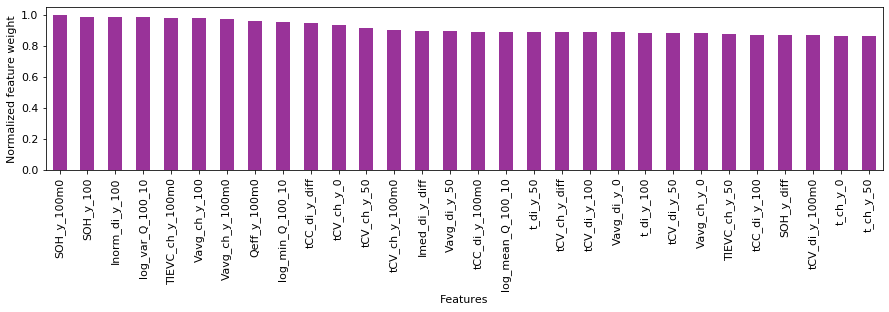

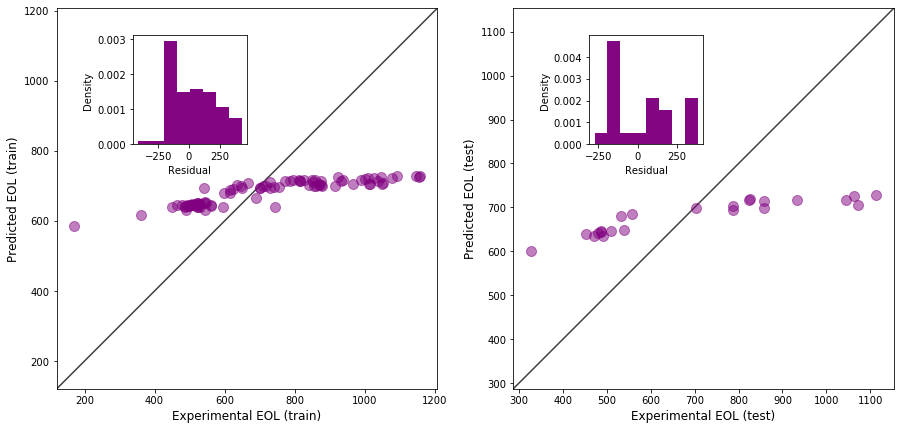

Fitting model with 40 percent of features...
147 features removed from a total of 244
NuSVR training has started...
NuSVR training has ended after 0.01 seconds
------------------
Model metrics:
------------------
{'MAE': 178.97878514287612,
 'MAPE': 0.2729340051326059,
 'MSE': 41076.77740009578,
 'R2 score': 0.24938375336977847,
 'RMSE': 202.67406691556712}


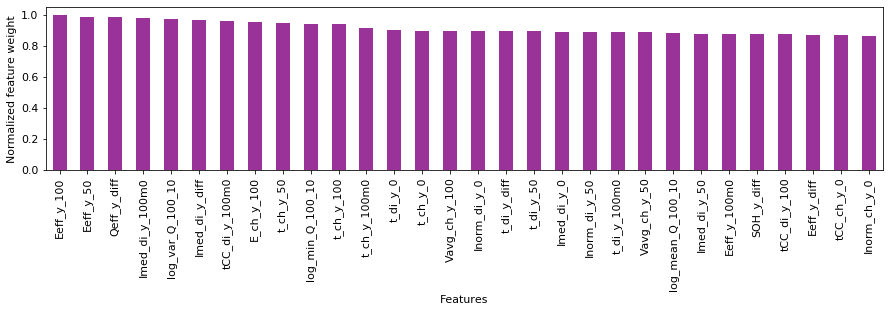

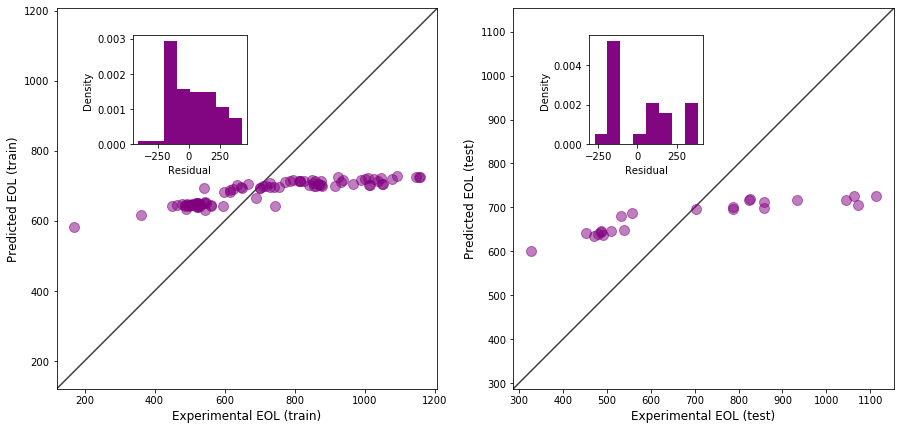

Fitting model with 30 percent of features...
171 features removed from a total of 244
NuSVR training has started...
NuSVR training has ended after 0.0 seconds
------------------
Model metrics:
------------------
{'MAE': 181.73038690161806,
 'MAPE': 0.27792581528084226,
 'MSE': 42305.68281470756,
 'R2 score': 0.22692735761130078,
 'RMSE': 205.68345294337013}


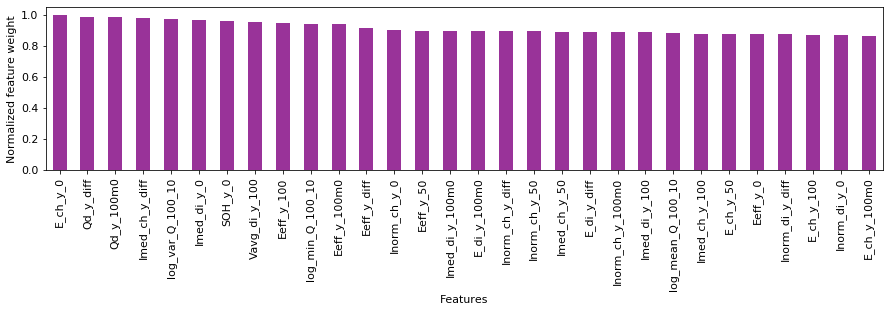

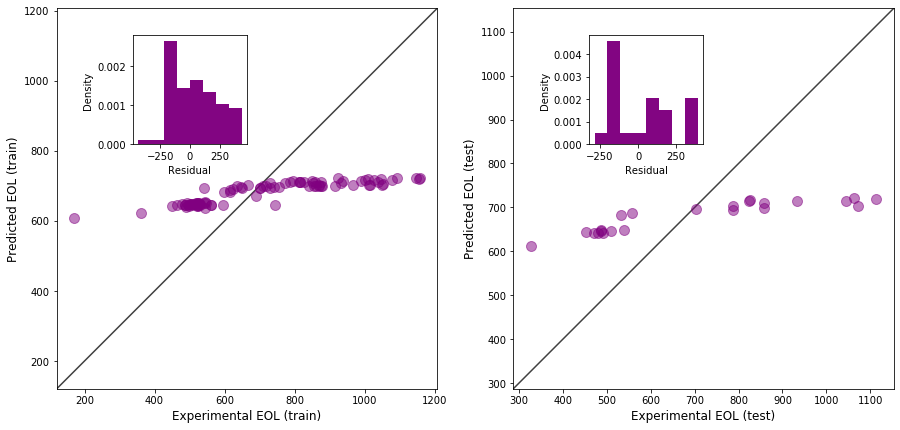

Fitting model with 20 percent of features...
196 features removed from a total of 244
NuSVR training has started...
NuSVR training has ended after 0.01 seconds
------------------
Model metrics:
------------------
{'MAE': 188.10972039446452,
 'MAPE': 0.289757262350232,
 'MSE': 44999.41554251951,
 'R2 score': 0.17770344868872578,
 'RMSE': 212.1306567719987}


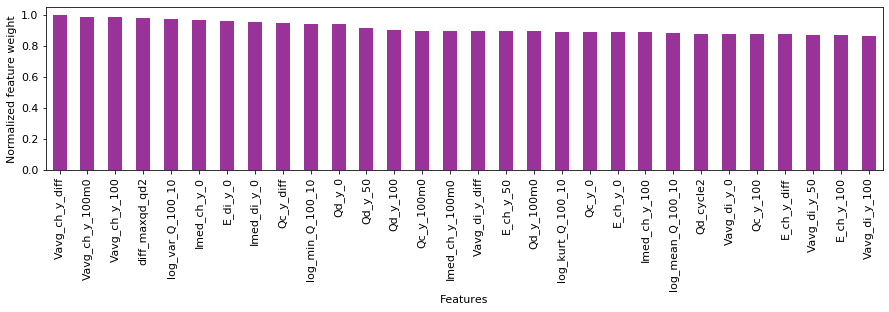

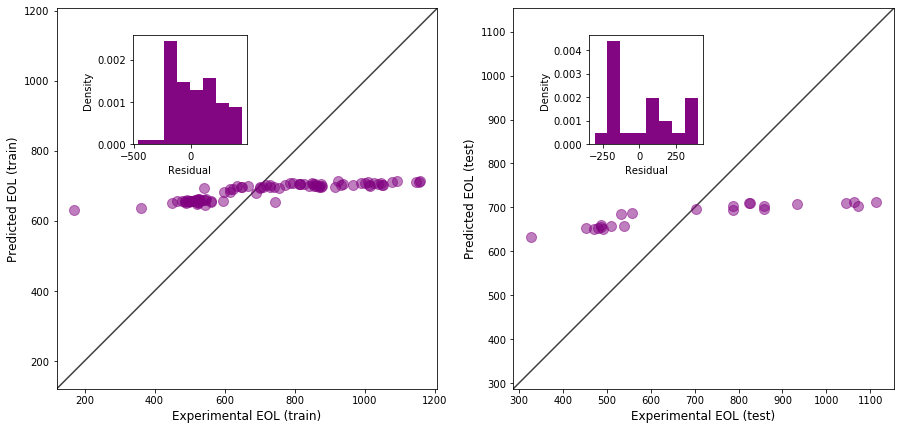

,MAE,MAPE,MSE,RMSE,R2 score
Features used (%),,,,,
90.0,177.873720,0.271231,40617.444530,201.537700,0.257777
80.0,177.865467,0.271204,40606.846936,201.511406,0.257971
60.0,177.794731,0.271417,40565.025602,201.407611,0.258735
50.0,178.203125,0.271767,40748.859310,201.863467,0.255376
40.0,178.978785,0.272934,41076.777400,202.674067,0.249384
30.0,181.730387,0.277926,42305.682815,205.683453,0.226927
20.0,188.109720,0.289757,44999.415543,212.130657,0.177703


In [36]:
metric_list = []

for k in k_list:
    print('Fitting model with {} percent of features...'.format(int(k*100)))
    model, metrics = utils_models.fit_nusvr(df=df,
                                            test_size=test_size,
                                            feature_selection=True,
                                            scaling=True,
                                            params=params,
                                            plot=True,
                                            fname='nusvr_model_ftselection_scaled_k_'+str(int(k*100)),
                                            k=k)
    metric_list.append(list(metrics.values()))

metric_data = pd.DataFrame(data=np.array(metric_list), columns=metrics.keys(), index=np.array(k_list)*100)
metric_data.index.name = 'Features used (%)'
metric_data

### Perform $k$-Fold Repeated Cross-validation on the model with feature selection and best MAPE

In [37]:
model = NuSVR(**params)
best_model_cross_val_scores = utils_models.repeated_kfold_cross_validation(model=model,
                                                                           df=df,
                                                                           n_splits=3,
                                                                           n_repeats=3,
                                                                           feature_selection=True,
                                                                           scaling=False,
                                                                           k=0.4)

best_model_cross_val_scores

147 features removed from a total of 244


{'test_MAE': (71.69380839599836, 9.025365953240257),
 'test_MAPE': (0.1012193135029413, 0.017979493597177636),
 'test_MSE': (9420.229691365139, 3040.434333294334),
 'test_R2 score': (0.8033834850087023, 0.04696713962987754)}

### Hyper-parameter tuning

In [38]:
estimator = NuSVR()
param_grid = {"nu": [0.1, 0.3, 0.5, 0.7, 0.9],
              "C": [0.001, 0.01, 0.1, 1.0],
              "kernel": ["linear", "poly", "rbf", "sigmoid"]}
scoring = 'neg_mean_absolute_percentage_error'
cv = 3

# for the model without feature selection
utils_models.hyperparameter_tuning(df, estimator, param_grid, scoring, cv, feature_selection=False, k=None)

({'C': 0.01, 'kernel': 'linear', 'nu': 0.3}, -0.12990494321788246)

In [39]:
# for the model with feature selection
utils_models.hyperparameter_tuning(df, estimator, param_grid, scoring, cv, feature_selection=True, k=0.4)

147 features removed from a total of 244


({'C': 0.01, 'kernel': 'linear', 'nu': 0.7}, -0.09871097401955575)

### Use the best hyper-parameter to rebuild the models and carry out repeated $k$-fold cross-validation

NuSVR training has started...
NuSVR training has ended after 0.01 seconds
------------------
Model metrics:
------------------
{'MAE': 63.994496020133816,
 'MAPE': 0.10001776998812088,
 'MSE': 6533.414490395074,
 'R2 score': 0.8806116893082169,
 'RMSE': 80.82953971411116}


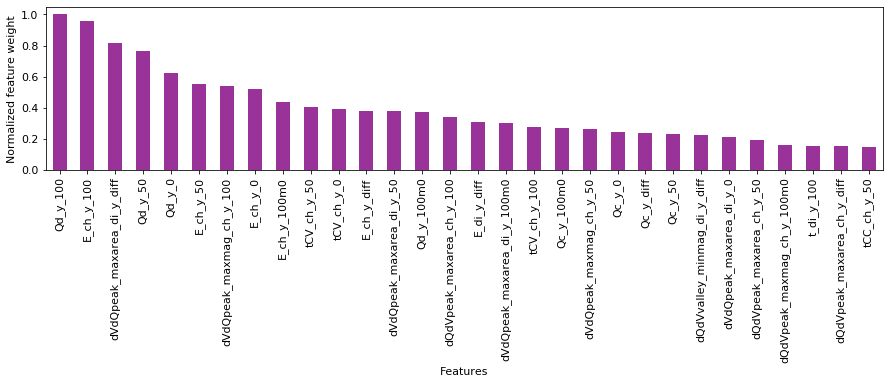

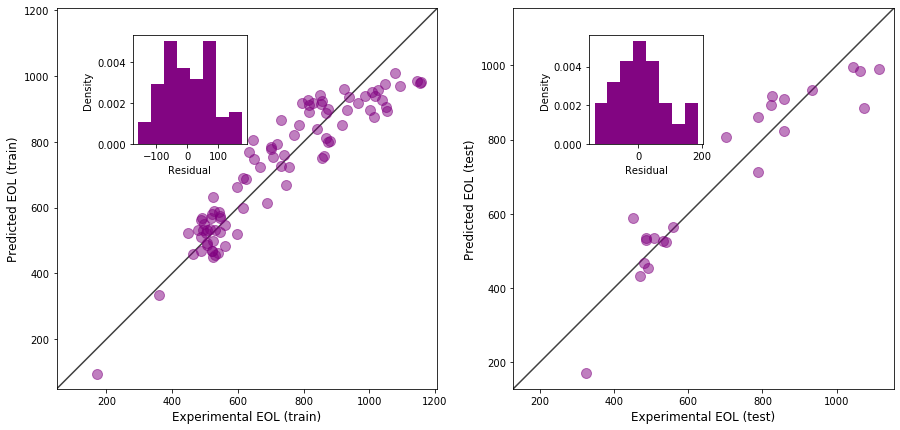

In [5]:
best_param_all = {"nu": 0.3,
              "C": 0.01,
              "kernel": "linear"}

# for the model using all the features 
best_model_all, metrics_all = utils_models.fit_nusvr(df=df,
                                                    test_size=test_size,
                                                    feature_selection=False,
                                                    scaling=False,
                                                    params=best_param_all,
                                                    plot=True,
                                                    fname='best_all_features_nusvr_model')

147 features removed from a total of 244
NuSVR training has started...
NuSVR training has ended after 0.02 seconds
------------------
Model metrics:
------------------
{'MAE': 61.844486321538525,
 'MAPE': 0.09384947427403115,
 'MSE': 5976.981355753512,
 'R2 score': 0.8907796668726975,
 'RMSE': 77.31093943132183}


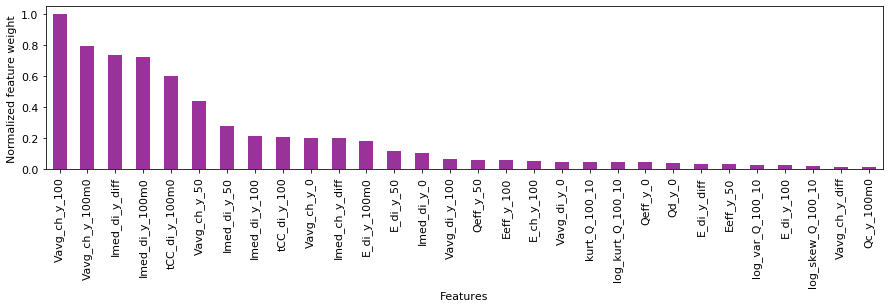

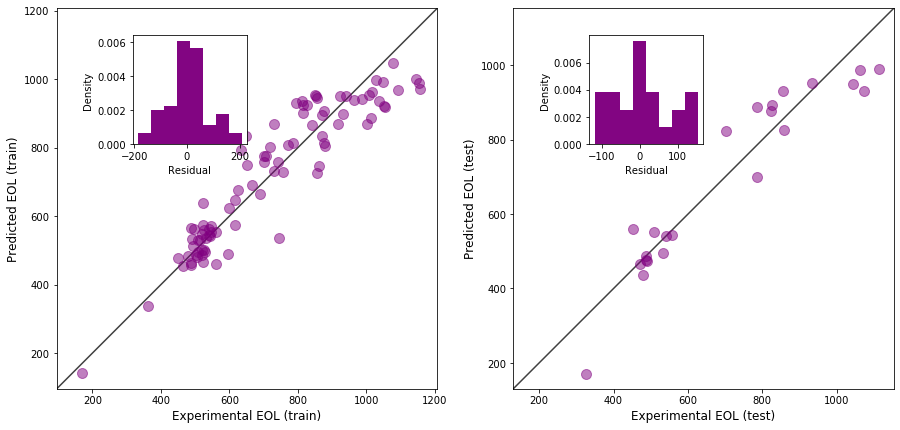

In [6]:
# for the model using selected features 
best_param_selected = {"nu": 0.7,
              "C": 0.01,
              "kernel": "linear"}

best_model_selected, metrics_selected = utils_models.fit_nusvr(df=df,
                                                               test_size=test_size,
                                                               feature_selection=True,
                                                               scaling=False,
                                                               params=best_param_selected,
                                                               plot=True,
                                                               fname='best_selected_features_nusvr_model',
                                                               k=0.4)

In [7]:
# Repeated k-fold cross-validation for the model obtained from grid search and using all features
model = NuSVR(**best_param_all)
utils_models.repeated_kfold_cross_validation(model=model,
                                            df=df,
                                            n_splits=3,
                                            n_repeats=3,
                                            feature_selection=False,
                                            scaling=False)



{'test_MAE': (80.63089060042786, 15.792119630685047),
 'test_MAPE': (0.11960497974857086, 0.03526287725688843),
 'test_MSE': (14683.508689235767, 10914.468628857076),
 'test_R2 score': (0.6996218270109532, 0.20168174938579836)}

In [8]:
# Repeated k-fold cross-validation for the model obtained from grid search and using selected features
model = NuSVR(**best_param_selected)
utils_models.repeated_kfold_cross_validation(model=model,
                                            df=df,
                                            n_splits=3,
                                            n_repeats=3,
                                            feature_selection=True,
                                            scaling=False,
                                            k=0.4)



147 features removed from a total of 244


{'test_MAE': (70.65624546423368, 8.695756930516957),
 'test_MAPE': (0.10055118236335614, 0.018523674657686524),
 'test_MSE': (9049.207040463973, 2700.24062402575),
 'test_R2 score': (0.8111533713576045, 0.04031235952300399)}